In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd /content/drive/MyDrive/Commit_File/24-1/DataScienceTeam9

/content/drive/MyDrive/Commit_File/24-1/DataScienceTeam9


In [40]:
!git config --global user.email 'gjwon123@naver.com'
!git config --global user.name 'djftk'

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv(r"태양광 발전량 현황.csv", encoding = 'cp949')
df2 = pd.read_csv(r"17년도22년까지.csv", encoding = 'cp949')

# 원래의 출력 설정으로 복원
pd.set_option('display.max_rows', 10)  # 최대 10개의 행을 출력
pd.set_option('display.max_columns', 20)  # 최대 20개의 열을 출력
pd.set_option('display.max_colwidth', 50)  # 각 열의 최대 너비를 50으로 제한
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 한 줄로 출력

In [42]:
df1

,날짜,발전기명,주소,설비용량(MW),일일발전량(Wh)
0,2017-01-01,광양항태양광,전남 광양시 도이동 775,2.3,4365000
1,2017-01-02,광양항태양광,전남 광양시 도이동 775,2.3,3974400
2,2017-01-03,광양항태양광,전남 광양시 도이동 775,2.3,4361400
3,2017-01-04,광양항태양광,전남 광양시 도이동 775,2.3,3960000
4,2017-01-05,광양항태양광,전남 광양시 도이동 775,2.3,2431800
...,...,...,...,...,...
10567,2022-12-27,울산태양광#1,울산시 남구 용잠로 623,0.5,1782960
10568,2022-12-28,울산태양광#1,울산시 남구 용잠로 623,0.5,1413456
10569,2022-12-29,울산태양광#1,울산시 남구 용잠로 623,0.5,1752432
10570,2022-12-30,울산태양광#1,울산시 남구 용잠로 623,0.5,1582416


In [43]:
category_counts = df1['발전기명'].value_counts()

In [44]:
category_counts

발전기명
광양항태양광           2191
당진태양광            2186
수원환경사업소태양광       2185
울산태양광#1          2183
동해시하수종말처리장태양광    1827
Name: count, dtype: int64

In [45]:
df2

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm)
0,106,동해,2017-01-01,7.1,1.4,553.0,12.1,1250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106,동해,2017-01-02,10.0,6.1,122.0,14.2,1157.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106,동해,2017-01-03,8.2,5.6,853.0,12.2,1441.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,106,동해,2017-01-04,7.7,3.0,2310.0,10.8,1019.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106,동해,2017-01-05,4.0,2.0,647.0,5.9,413.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10950,266,광양시,2022-12-27,1.9,-2.7,533.0,8.0,1440.0,NaN,NaN,...,2.8,3.4,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
10951,266,광양시,2022-12-28,1.7,-1.3,157.0,6.5,1347.0,NaN,NaN,...,3.0,3.5,NaN,NaN,NaN,NaN,NaN,1.6,2.2,NaN
10952,266,광양시,2022-12-29,1.4,-3.1,744.0,7.6,1345.0,NaN,NaN,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
10953,266,광양시,2022-12-30,1.6,-2.5,444.0,6.7,1500.0,NaN,NaN,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.5,2.1,NaN


In [46]:
#두 데이터 셋을 합치기 위해, df2의 일시 칼럼명을 날짜로 변환
df2.rename(columns={'일시': '날짜'}, inplace=True)

# 병합 조건을 정의
merge_conditions = {
    "전남 광양시 도이동 775": "광양시"
}

# 지역 조건에 따른 매칭 컬럼 추가
df1['지역_매칭'] = df1['주소'].map(merge_conditions)
df2['지역_매칭'] = df2['지점명']

# '날짜'와 '지역_매칭' 컬럼을 기준으로 병합
Gwangyang_df = pd.merge(df1, df2, on=['날짜', '지역_매칭'], how='inner', suffixes=('_A', '_B'))

# 불필요한 '지역_매칭' 컬럼 제거
Gwangyang_df.drop(columns=['지역_매칭'], inplace=True)

In [47]:
Gwangyang_df

,날짜,발전기명,주소,설비용량(MW),일일발전량(Wh),지점,지점명,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),...,평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm)
0,2017-01-01,광양항태양광,전남 광양시 도이동 775,2.3,4365000,266,광양시,5.6,0.7,531.0,...,4.7,3.7,NaN,NaN,NaN,NaN,NaN,1.2,1.7,NaN
1,2017-01-02,광양항태양광,전남 광양시 도이동 775,2.3,3974400,266,광양시,8.9,4.0,34.0,...,5.9,4.6,NaN,NaN,NaN,NaN,NaN,1.7,2.4,NaN
2,2017-01-03,광양항태양광,전남 광양시 도이동 775,2.3,4361400,266,광양시,7.1,2.7,645.0,...,6.1,5.0,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
3,2017-01-04,광양항태양광,전남 광양시 도이동 775,2.3,3960000,266,광양시,7.1,2.8,326.0,...,5.9,4.8,NaN,NaN,NaN,NaN,NaN,1.7,2.4,NaN
4,2017-01-05,광양항태양광,전남 광양시 도이동 775,2.3,2431800,266,광양시,8.2,5.1,18.0,...,6.1,4.9,NaN,NaN,NaN,NaN,NaN,1.6,2.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2022-12-27,광양항태양광,전남 광양시 도이동 775,2.3,4987800,266,광양시,1.9,-2.7,533.0,...,2.8,3.4,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
2187,2022-12-28,광양항태양광,전남 광양시 도이동 775,2.3,4334400,266,광양시,1.7,-1.3,157.0,...,3.0,3.5,NaN,NaN,NaN,NaN,NaN,1.6,2.2,NaN
2188,2022-12-29,광양항태양광,전남 광양시 도이동 775,2.3,5013000,266,광양시,1.4,-3.1,744.0,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
2189,2022-12-30,광양항태양광,전남 광양시 도이동 775,2.3,4122000,266,광양시,1.6,-2.5,444.0,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.5,2.1,NaN


In [48]:
Gwangyang_df.drop('발전기명', axis=1, inplace=True)
Gwangyang_df.drop('주소', axis=1, inplace=True)
Gwangyang_df.drop('지점', axis=1, inplace=True)
Gwangyang_df.drop('설비용량(MW)', axis=1, inplace=True)

In [49]:
# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

Gwangyang_df.dtypes

날짜                      object
일일발전량(Wh)                int64
지점명                     object
평균기온(°C)               float64
최저기온(°C)               float64
최저기온 시각(hhmi)          float64
최고기온(°C)               float64
최고기온 시각(hhmi)          float64
강수 계속시간(hr)            float64
10분 최다 강수량(mm)         float64
10분 최다강수량 시각(hhmi)     float64
1시간 최다강수량(mm)          float64
1시간 최다 강수량 시각(hhmi)    float64
일강수량(mm)               float64
최대 순간 풍속(m/s)          float64
최대 순간 풍속 풍향(16방위)      float64
최대 순간풍속 시각(hhmi)       float64
최대 풍속(m/s)             float64
최대 풍속 풍향(16방위)         float64
최대 풍속 시각(hhmi)         float64
평균 풍속(m/s)             float64
풍정합(100m)              float64
최다풍향(16방위)             float64
평균 이슬점온도(°C)           float64
최소 상대습도(%)             float64
최소 상대습도 시각(hhmi)       float64
평균 상대습도(%)             float64
평균 증기압(hPa)            float64
평균 현지기압(hPa)           float64
최고 해면기압(hPa)           float64
최고 해면기압 시각(hhmi)       float64
최저 해면기압(hPa)           float64
최저 해면기압 

In [50]:
# '날짜' 열을 YYYYMMDD 형식의 정수형으로 변환하여 새로운 열로 추가
Gwangyang_df['날짜_numeric'] = Gwangyang_df['날짜'].str.replace('-', '').astype(int)
Gwangyang_df.drop('날짜', axis=1, inplace=True)
Gwangyang_df.rename(columns={'날짜_numeric': '날짜'}, inplace=True)

In [51]:
Gwangyang_df.describe()

,일일발전량(Wh),평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),1시간 최다일사량(MJ/m2),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),날짜
count,2.191000e+03,2182.000000,2190.000000,2190.000000,2190.000000,2190.000000,0.0,536.000000,359.000000,536.000000,375.000000,830.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2181.000000,2179.000000,2187.000000,2187.000000,2179.000000,2179.000000,2182.000000,2190.000000,2190.000000,2188.000000,2190.000000,2182.000000,2189.000000,2185.000000,2188.000000,2188.000000,2187.000000,0.0,0.0,0.0,0.0,0.0,1610.000000,1585.000000,2190.000000,2190.000000,2176.000000,2179.000000,2179.000000,2179.000000,0.0,0.0,0.0,0.0,0.0,2174.000000,2174.000000,0.0,2.191000e+03
mean,6.498393e+06,15.140330,10.994247,876.079909,20.283836,1352.887671,NaN,1.931716,1071.607242,4.878358,1071.621333,10.101446,6.245114,186.972603,1280.579909,4.422055,187.753425,1286.138356,1.817032,1569.955251,193.484640,7.495916,43.131916,1305.506173,63.514640,13.183938,1006.011228,1018.856849,1172.084018,1013.781718,1263.754795,1016.298350,12.191229,6.557574,1197.760512,2.383903,15.325048,NaN,NaN,NaN,NaN,NaN,5.202981,2.340000,16.771872,8.493333,16.469393,16.632951,16.677650,16.042221,NaN,NaN,NaN,NaN,NaN,2.887856,4.125207,NaN,2.019567e+07
std,3.121345e+06,8.744667,9.170240,744.028753,8.662956,302.935017,NaN,2.855682,730.458499,7.816143,743.477643,21.898769,2.578968,98.627003,558.338369,1.721116,99.043269,580.290104,1.031849,890.936733,99.273315,11.262152,18.991755,414.032620,16.883329,8.874594,7.345924,7.673459,934.307816,7.940995,712.870120,7.717512,1.620345,3.872044,110.448697,0.863315,7.139374,NaN,NaN,NaN,NaN,NaN,2.916870,1.965971,9.978084,10.282254,9.529586,9.166854,8.640677,8.249510,NaN,NaN,NaN,NaN,NaN,1.417451,2.023863,NaN,1.708201e+04
min,0.000000e+00,-8.600000,-11.800000,1.000000,-3.800000,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,1.500000,20.000000,1.000000,1.100000,20.000000,1.000000,0.200000,172.000000,20.000000,-21.400000,3.000000,1.000000,21.400000,1.200000,981.100000,995.000000,1.000000,973.200000,1.000000,990.700000,9.800000,0.000000,700.000000,0.130000,0.690000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-5.200000,-14.200000,-2.800000,-1.100000,0.400000,0.900000,NaN,NaN,NaN,NaN,NaN,0.300000,0.400000,NaN,2.017010e+07
25%,4.284900e+06,8.000000,3.500000,449.000000,13.100000,1323.000000,NaN,0.100000,408.000000,0.100000,349.500000,0.000000,4.300000,70.000000,1024.250000,3.100000,70.000000,1014.000000,1.100000,925.000000,70.000000,-1.600000,28.000000,1234.000000,51.100000,5.600000,1000.400000,1012.600000,101.250000,1007.900000,451.250000,1010.300000,10.600000,3.300000,1200.000000,1.910000,10.460000,NaN,NaN,NaN,NaN,NaN,2.800000,0.500000,8.100000,-0.100000,8.000000,8.300000,8.700000,8.300000,NaN,NaN,NaN,NaN,NaN,1.800000,2.500000,NaN,2.018070e+07
50%,6.282000e+06,15.600000,10.900000,605.000000,21.400000,1414.000000,NaN,0.500000,1014.000000,1.000000,1031.000000,1.000000,5.800000,230.000000,1339.000000,4.100000,230.000000,1349.500000,1.500000,1311.000000,250.000000,7.500000,41.000000,1359.000000,63.300000,10.600000,1006.400000,1019.200000,924.000000,1014.000000,1519.000000,1016.600000,12.200000,7.700000,1200.000000,2.460000,14.870000,NaN,NaN,NaN,NaN,NaN,5.500000,2.000000,17.200000,7.850000,16.800000,17.100000,17.200000,16.800

In [52]:
Gwangyang_df.isnull().sum()

일일발전량(Wh)                 0
지점명                       0
평균기온(°C)                  9
최저기온(°C)                  1
최저기온 시각(hhmi)             1
최고기온(°C)                  1
최고기온 시각(hhmi)             1
강수 계속시간(hr)            2191
10분 최다 강수량(mm)         1655
10분 최다강수량 시각(hhmi)     1832
1시간 최다강수량(mm)          1655
1시간 최다 강수량 시각(hhmi)    1816
일강수량(mm)               1361
최대 순간 풍속(m/s)             1
최대 순간 풍속 풍향(16방위)         1
최대 순간풍속 시각(hhmi)          1
최대 풍속(m/s)                1
최대 풍속 풍향(16방위)            1
최대 풍속 시각(hhmi)            1
평균 풍속(m/s)                1
풍정합(100m)                 1
최다풍향(16방위)               10
평균 이슬점온도(°C)             12
최소 상대습도(%)                4
최소 상대습도 시각(hhmi)          4
평균 상대습도(%)               12
평균 증기압(hPa)              12
평균 현지기압(hPa)              9
최고 해면기압(hPa)              1
최고 해면기압 시각(hhmi)          1
최저 해면기압(hPa)              3
최저 해면기압 시각(hhmi)          1
평균 해면기압(hPa)              9
가조시간(hr)                  2
합계 일조시간(hr)               6
1시간 최다일사 시각(hhmi)   

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

# 수치형 열만 선택
Gwangyang_num_df = Gwangyang_df.select_dtypes(include=[np.number])

# 상관관계 분석
correlation_matrix = Gwangyang_num_df.corr()
print(correlation_matrix['일일발전량(Wh)'])

일일발전량(Wh)              1.000000
평균기온(°C)               0.403559
최저기온(°C)               0.295014
최저기온 시각(hhmi)         -0.241553
최고기온(°C)               0.513663
최고기온 시각(hhmi)          0.216338
강수 계속시간(hr)                 NaN
10분 최다 강수량(mm)        -0.288691
10분 최다강수량 시각(hhmi)    -0.087397
1시간 최다강수량(mm)         -0.329593
1시간 최다 강수량 시각(hhmi)   -0.091539
일강수량(mm)              -0.333686
최대 순간 풍속(m/s)         -0.120546
최대 순간 풍속 풍향(16방위)      0.047326
최대 순간풍속 시각(hhmi)      -0.023926
최대 풍속(m/s)            -0.174634
최대 풍속 풍향(16방위)         0.040196
최대 풍속 시각(hhmi)        -0.026813
평균 풍속(m/s)            -0.104504
풍정합(100m)             -0.104015
최다풍향(16방위)             0.063751
평균 이슬점온도(°C)           0.213984
최소 상대습도(%)            -0.302851
최소 상대습도 시각(hhmi)       0.261614
평균 상대습도(%)            -0.221138
평균 증기압(hPa)            0.194437
평균 현지기압(hPa)          -0.253760
최고 해면기압(hPa)          -0.325377
최고 해면기압 시각(hhmi)       0.161029
최저 해면기압(hPa)          -0.216107
최저 해면기압 시각(hhmi)      -0.108811
평균 해면기압(

In [54]:
# 특정 칼럼과 다른 칼럼들의 상관계수 추출
target_column = '일일발전량(Wh)'
target_correlations = correlation_matrix[target_column]

# 강수량과의 상관계수가 0.3 이상이거나 -0.3 이하인 feature들만 추출
filtered_correlations = target_correlations[(target_correlations.abs() >= 0.2)].sort_values(ascending=False)

# 자기 자신과의 상관계수는 항상 1이므로, 이를 제외
filtered_correlations = filtered_correlations[filtered_correlations.index != target_column]

# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

# 결과 출력
print(f"{target_column}와 상관계수의 절댓값이 0.2 이상인 feature들:")
print(filtered_correlations)

일일발전량(Wh)와 상관계수의 절댓값이 0.2 이상인 feature들:
합계 일사량(MJ/m2)       0.951914
1시간 최다일사량(MJ/m2)    0.909678
합계 대형증발량(mm)        0.897443
합계 소형증발량(mm)        0.897230
합계 일조시간(hr)         0.761657
최고기온(°C)            0.513663
가조시간(hr)            0.511966
평균 지면온도(°C)         0.499757
평균 5cm 지중온도(°C)     0.467669
평균 10cm 지중온도(°C)    0.446136
평균 20cm 지중온도(°C)    0.408778
평균기온(°C)            0.403559
평균 30cm 지중온도(°C)    0.392489
최저기온(°C)            0.295014
최저 초상온도(°C)         0.267925
최소 상대습도 시각(hhmi)    0.261614
최고기온 시각(hhmi)       0.216338
평균 이슬점온도(°C)        0.213984
최저 해면기압(hPa)       -0.216107
평균 상대습도(%)         -0.221138
최저기온 시각(hhmi)      -0.241553
평균 현지기압(hPa)       -0.253760
평균 해면기압(hPa)       -0.264149
10분 최다 강수량(mm)     -0.288691
최소 상대습도(%)         -0.302851
최고 해면기압(hPa)       -0.325377
1시간 최다강수량(mm)      -0.329593
일강수량(mm)           -0.333686
평균 전운량(1/10)       -0.400634
평균 중하층운량(1/10)     -0.430780
Name: 일일발전량(Wh), dtype: float64


In [55]:
# 필요한 열 리스트
required_columns = [
    '일일발전량(Wh)',
    '합계 일사량(MJ/m2)',
    '1시간 최다일사량(MJ/m2)',
    '합계 대형증발량(mm)',
    '합계 소형증발량(mm)',
    '합계 일조시간(hr)',
    '최고기온(°C)',
    '가조시간(hr)',
    '평균 지면온도(°C)',
    '평균 5cm 지중온도(°C)',
    '평균 10cm 지중온도(°C)',
    '평균 20cm 지중온도(°C)',
    '평균기온(°C)',
    '평균 30cm 지중온도(°C)',
    '최저기온(°C)',
    '최저 초상온도(°C)',
    '최소 상대습도 시각(hhmi)',
    '최고기온 시각(hhmi)',
    '평균 이슬점온도(°C)',
    '최저 해면기압(hPa)',
    '평균 상대습도(%)',
    '최저기온 시각(hhmi)',
    '평균 현지기압(hPa)',
    '평균 해면기압(hPa)',
    '10분 최다 강수량(mm)',
    '최소 상대습도(%)',
    '최고 해면기압(hPa)',
    '1시간 최다강수량(mm)',
    '일강수량(mm)',
    '평균 전운량(1/10)',
    '평균 중하층운량(1/10)'
]

#일일발전량과의 상관계수가 0.2이상인 feature들만 남기고, 필요하지 않은 칼럼 제거
Gwangyang_df_filtered = Gwangyang_df[required_columns]

In [56]:
# 원래의 출력 설정으로 복원
pd.set_option('display.max_rows', 10)  # 최대 10개의 행을 출력
pd.set_option('display.max_columns', 20)  # 최대 20개의 열을 출력
pd.set_option('display.max_colwidth', 50)  # 각 열의 최대 너비를 50으로 제한
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 한 줄로 출력

Gwangyang_df_filtered

,일일발전량(Wh),합계 일사량(MJ/m2),1시간 최다일사량(MJ/m2),합계 대형증발량(mm),합계 소형증발량(mm),합계 일조시간(hr),최고기온(°C),가조시간(hr),평균 지면온도(°C),평균 5cm 지중온도(°C),...,최저기온 시각(hhmi),평균 현지기압(hPa),평균 해면기압(hPa),10분 최다 강수량(mm),최소 상대습도(%),최고 해면기압(hPa),1시간 최다강수량(mm),일강수량(mm),평균 전운량(1/10),평균 중하층운량(1/10)
0,4365000,11.07,1.91,1.2,1.7,8.8,11.6,9.9,5.6,4.0,...,531.0,1017.2,1027.3,NaN,57.0,1030.6,NaN,NaN,NaN,NaN
1,3974400,9.70,1.94,1.7,2.4,5.8,15.2,9.9,8.3,6.1,...,34.0,1011.9,1021.8,NaN,52.0,1024.3,NaN,0.0,NaN,NaN
2,4361400,11.33,1.92,1.8,2.6,9.0,12.6,9.9,7.9,5.2,...,645.0,1012.5,1022.5,NaN,32.0,1024.6,NaN,NaN,NaN,NaN
3,3960000,10.34,1.83,1.7,2.4,8.1,12.3,9.9,6.7,5.0,...,326.0,1012.4,1022.3,NaN,44.0,1024.3,NaN,NaN,NaN,NaN
4,2431800,5.83,1.30,1.6,2.3,0.3,10.8,9.9,7.6,5.6,...,18.0,1014.9,1024.9,NaN,53.0,1027.1,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,4987800,11.56,2.01,1.8,2.6,8.6,8.0,9.8,0.8,1.8,...,533.0,1016.6,1027.7,NaN,30.0,1029.3,NaN,NaN,1.1,0.0
2187,4334400,9.56,1.80,1.6,2.2,6.5,6.5,9.8,1.0,1.9,...,157.0,1018.2,1029.4,NaN,43.0,1032.0,NaN,NaN,NaN,2.4
2188,5013000,11.56,2.02,1.8,2.6,8.2,7.6,9.8,0.8,1.8,...,744.0,1020.8,1032.0,NaN,35.0,1033.4,NaN,NaN,2.8,0.5
2189,4122000,9.51,1.53,1.5,2.1,7.2,6.7,9.8,1.0,1.7,...,444.0,1020.6,1031.8,NaN,41.0,1033.6,NaN,NaN,4.5,1.5


In [57]:
# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

Gwangyang_df_filtered.isnull().sum()

일일발전량(Wh)              0
합계 일사량(MJ/m2)          4
1시간 최다일사량(MJ/m2)       3
합계 대형증발량(mm)          17
합계 소형증발량(mm)          17
합계 일조시간(hr)            6
최고기온(°C)               1
가조시간(hr)               2
평균 지면온도(°C)            1
평균 5cm 지중온도(°C)       15
평균 10cm 지중온도(°C)      12
평균 20cm 지중온도(°C)      12
평균기온(°C)               9
평균 30cm 지중온도(°C)      12
최저기온(°C)               1
최저 초상온도(°C)            1
최소 상대습도 시각(hhmi)       4
최고기온 시각(hhmi)          1
평균 이슬점온도(°C)          12
최저 해면기압(hPa)           3
평균 상대습도(%)            12
최저기온 시각(hhmi)          1
평균 현지기압(hPa)           9
평균 해면기압(hPa)           9
10분 최다 강수량(mm)      1655
최소 상대습도(%)             4
최고 해면기압(hPa)           1
1시간 최다강수량(mm)       1655
일강수량(mm)            1361
평균 전운량(1/10)         581
평균 중하층운량(1/10)       606
dtype: int64

In [58]:
# 결측치 처리

# 10분 최다 강수량과 1시간 최다 강수량, 일강수량 열의 nan 값을 0으로 간주하고 대체
Gwangyang_df_filtered['10분 최다 강수량(mm)'].fillna(0, inplace=True)
Gwangyang_df_filtered['1시간 최다강수량(mm)'].fillna(0, inplace=True)
Gwangyang_df_filtered['일강수량(mm)'].fillna(0, inplace=True)

# 평균 전운량 열의 결측치를 평균값으로 대체
mean_cloud_coverage = Gwangyang_df_filtered['평균 전운량(1/10)'].mean()
Gwangyang_df_filtered['평균 전운량(1/10)'].fillna(mean_cloud_coverage, inplace=True)

# 평균 중하층운량 열의 결측치를 평균값으로 대체
mean_mid_low_clouds = Gwangyang_df_filtered['평균 중하층운량(1/10)'].mean()
Gwangyang_df_filtered['평균 중하층운량(1/10)'].fillna(mean_mid_low_clouds, inplace=True)

# 남은 열의 결측치는 전날과 비슷할 것으로 예상하고 결측치를 전날 값과 유사한 값으로 대체(ffill 사용)
Gwangyang_df_filtered.fillna(method='ffill', inplace=True)

Gwangyang_df_filtered.isnull().sum()

<ipython-input-58-db5c3868130d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangyang_df_filtered['10분 최다 강수량(mm)'].fillna(0, inplace=True)
<ipython-input-58-db5c3868130d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangyang_df_filtered['1시간 최다강수량(mm)'].fillna(0, inplace=True)
<ipython-input-58-db5c3868130d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangyang_df_filtered['일강수량(mm)'].fillna(0, inplace=True)
<ipython-in

일일발전량(Wh)           0
합계 일사량(MJ/m2)       0
1시간 최다일사량(MJ/m2)    0
합계 대형증발량(mm)        0
합계 소형증발량(mm)        0
합계 일조시간(hr)         0
최고기온(°C)            0
가조시간(hr)            0
평균 지면온도(°C)         0
평균 5cm 지중온도(°C)     0
평균 10cm 지중온도(°C)    0
평균 20cm 지중온도(°C)    0
평균기온(°C)            0
평균 30cm 지중온도(°C)    0
최저기온(°C)            0
최저 초상온도(°C)         0
최소 상대습도 시각(hhmi)    0
최고기온 시각(hhmi)       0
평균 이슬점온도(°C)        0
최저 해면기압(hPa)        0
평균 상대습도(%)          0
최저기온 시각(hhmi)       0
평균 현지기압(hPa)        0
평균 해면기압(hPa)        0
10분 최다 강수량(mm)      0
최소 상대습도(%)          0
최고 해면기압(hPa)        0
1시간 최다강수량(mm)       0
일강수량(mm)            0
평균 전운량(1/10)        0
평균 중하층운량(1/10)      0
dtype: int64

In [59]:
# Min-Max 스케일링
scaler = MinMaxScaler()
scaled_columns = Gwangyang_df_filtered.columns

# 스케일링을 적용하고 데이터프레임으로 변환
Gwangyang_df_scaled = pd.DataFrame(scaler.fit_transform(Gwangyang_df_filtered), columns=scaled_columns)

# 스케일링된 데이터프레임 출력
print(Gwangyang_df_scaled)

      일일발전량(Wh)  합계 일사량(MJ/m2)  1시간 최다일사량(MJ/m2)  합계 대형증발량(mm)  합계 소형증발량(mm)  합계 일조시간(hr)  최고기온(°C)  가조시간(hr)  평균 지면온도(°C)  평균 5cm 지중온도(°C)  평균 10cm 지중온도(°C)  평균 20cm 지중온도(°C)  평균기온(°C)  평균 30cm 지중온도(°C)  최저기온(°C)  최저 초상온도(°C)  최소 상대습도 시각(hhmi)  최고기온 시각(hhmi)  평균 이슬점온도(°C)  최저 해면기압(hPa)  평균 상대습도(%)  최저기온 시각(hhmi)  평균 현지기압(hPa)  평균 해면기압(hPa)  10분 최다 강수량(mm)  최소 상대습도(%)  최고 해면기압(hPa)  1시간 최다강수량(mm)  일강수량(mm)  평균 전운량(1/10)  평균 중하층운량(1/10)
0      0.314282       0.338001          0.477212      0.136364      0.136842     0.647059  0.371981  0.021277     0.243243         0.174359          0.150273          0.130699  0.354115          0.087774  0.318066     0.292857          0.568702       0.644614      0.484472      0.845258    0.739691       0.220925      0.841492      0.824324        0.000000    0.562500      0.837647          0.000  0.000000      0.520298          0.2925
1      0.286159       0.293390          0.485255      0.212121      0.210526     0.426471  0.458937  0.021277     0.3040

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


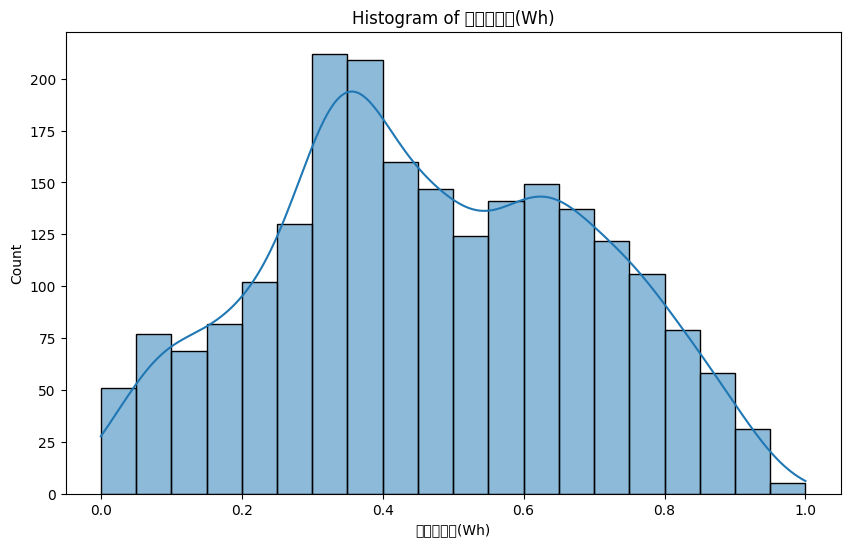

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


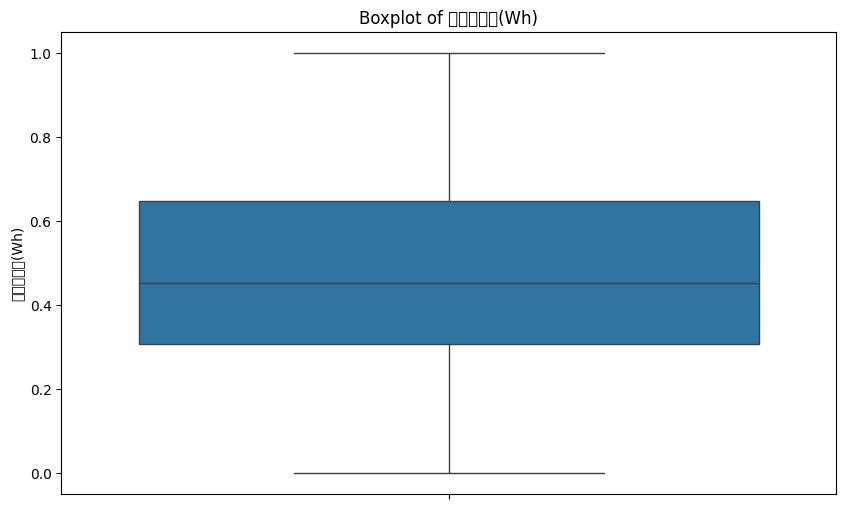

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

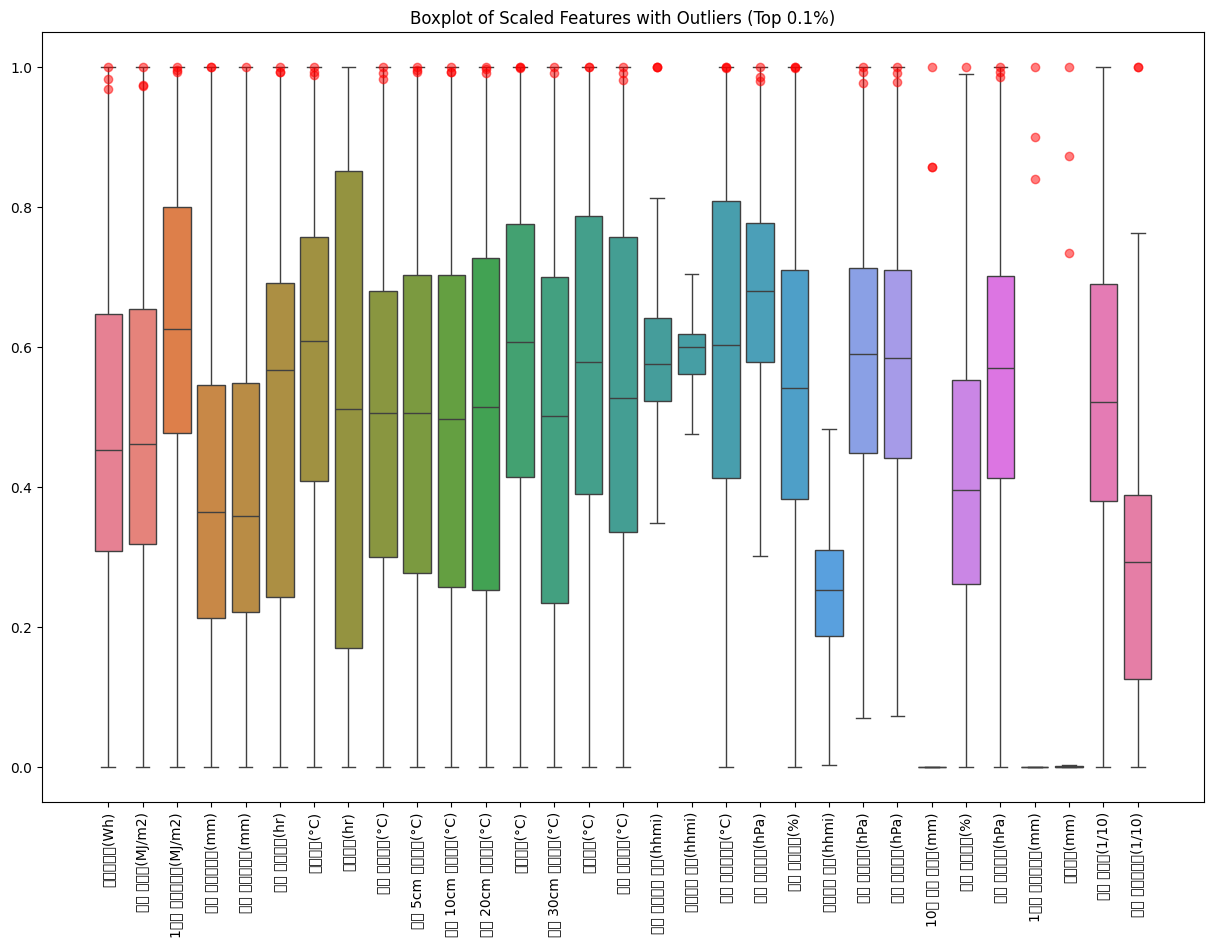

In [60]:
#스케일링 그래프 예시

# 특정 컬럼 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(Gwangyang_df_scaled['일일발전량(Wh)'], kde=True)
plt.title('Histogram of 일일발전량(Wh)')
plt.show()

# 특정 컬럼 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(y=Gwangyang_df_scaled['일일발전량(Wh)'])
plt.title('Boxplot of 일일발전량(Wh)')
plt.show()

# 박스플롯 시각화 (상위 1% 이상치 표시)
plt.figure(figsize=(15, 10))
sns.boxplot(data=Gwangyang_df_scaled, showfliers=False)  # 이상치 숨기기

# 상위 1%에 해당하는 임계점 계산
threshold = np.percentile(Gwangyang_df_scaled, 99.9, axis=0)

#이상치 표시
for column, thresh in zip(Gwangyang_df_scaled.columns, threshold):
    outliers = Gwangyang_df_scaled[Gwangyang_df_scaled[column] > thresh][column]
    plt.plot(np.repeat(column, len(outliers)), outliers, 'ro', alpha=0.5)  # 이상치를 빨간색으로 점으로 표시

plt.xticks(rotation=90)
plt.title('Boxplot of Scaled Features with Outliers (Top 0.1%)')
plt.show()

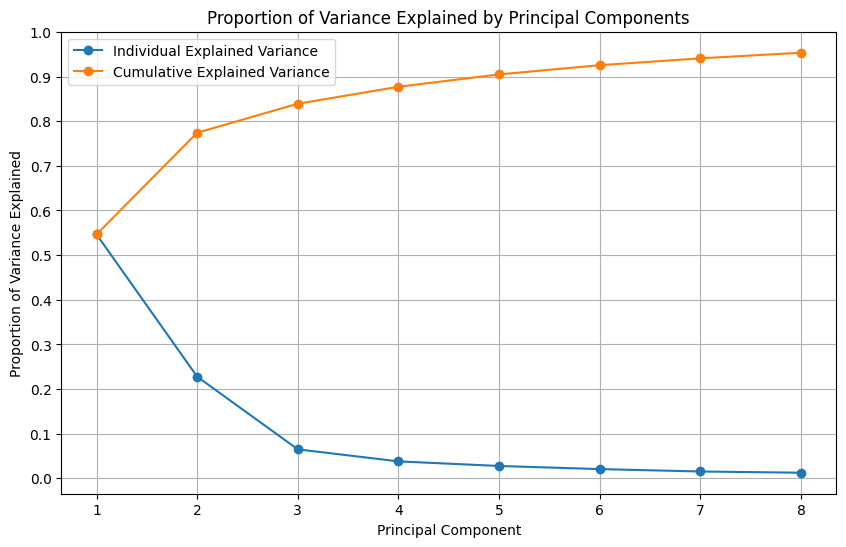

In [61]:
from sklearn.decomposition import PCA

# PCA 수행
n_components = 8
pca = PCA(n_components)
pca.fit(Gwangyang_df_scaled.drop(columns=['일일발전량(Wh)']))

# 각 주성분이 설명하는 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 비율
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='-', label='Individual Explained Variance')
plt.plot(range(1, n_components + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# 주성분 선택
selected_components = np.where((cumulative_explained_variance_ratio >= 0.5) & (cumulative_explained_variance_ratio <= 0.9))[0] + 1

# PCA로 변환된 주성분 선택
X_pca_selected = pca.transform(Gwangyang_df_scaled.drop(columns=['일일발전량(Wh)']))[:, selected_components - 1]

# 주성분의 개수 계산
num_components = selected_components.shape[0]

# 데이터프레임 생성
df_pca_selected = pd.DataFrame(X_pca_selected, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# 기존의 독립 변수 데이터프레임과 합치기
Gwangyang_df_combined = pd.concat([df_pca_selected, Gwangyang_df_filtered['일일발전량(Wh)']], axis=1)

# 원래의 출력 설정으로 복원
pd.set_option('display.max_rows', 10)  # 최대 10개의 행을 출력
pd.set_option('display.max_columns', 20)  # 최대 20개의 열을 출력
pd.set_option('display.max_colwidth', 50)  # 각 열의 최대 너비를 50으로 제한
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 한 줄로 출력

print(Gwangyang_df_combined)  # 데이터프레임 확인

           PC1       PC2       PC3       PC4  일일발전량(Wh)
0     1.082524  0.205600 -0.274555 -0.149576    4365000
1     0.850916  0.240823 -0.430554 -0.104923    3974400
2     1.007245  0.002078 -0.140003 -0.010811    4361400
3     0.988310  0.116950 -0.298233 -0.040969    3960000
4     0.970275  0.546427 -0.506172 -0.110396    2431800
...        ...       ...       ...       ...        ...
2186  1.415447 -0.221686 -0.173933 -0.295927    4987800
2187  1.349441  0.143260 -0.392139  0.008222    4334400
2188  1.445691 -0.109972 -0.132249 -0.219672    5013000
2189  1.406061  0.124700 -0.298741 -0.132167    4122000
2190  1.400369 -0.184700 -0.271989 -0.293603    4982400

[2191 rows x 5 columns]


In [80]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

# 마지막 31개 데이터 제외 (2017-01-01 ~ 2022-11-30) (예측 데이터 : 2022-12-01~31)
train_data = Gwangyang_df_filtered.iloc[:-31]
train_data_scaled = Gwangyang_df_scaled.iloc[:-31]

# 예측할 데이터 추출 (2022-12-01 ~ 2022-12-31)
train_data_pca = Gwangyang_df_combined[:-31]
predict_data = Gwangyang_df_filtered.iloc[-31:]
predict_data_scaled = Gwangyang_df_scaled.iloc[-31:]


# KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

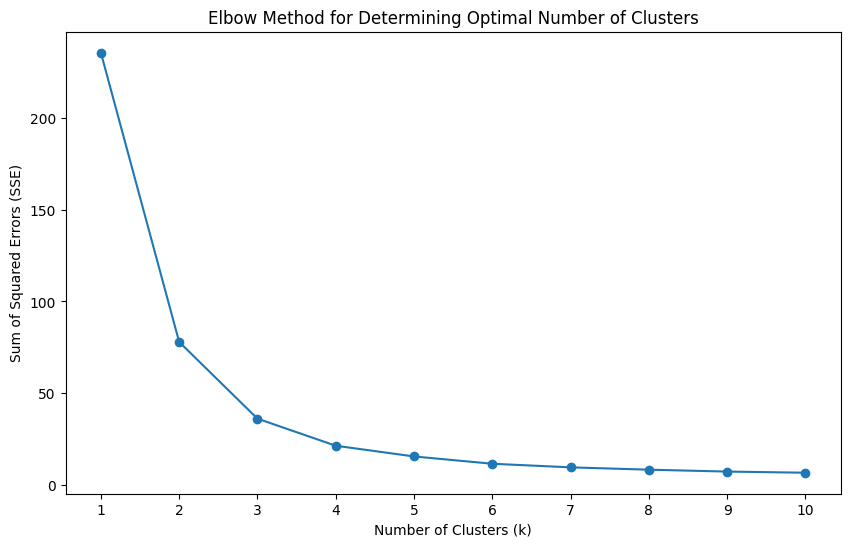

In [82]:
# 두 개의 변수만을 추출
X_selected = Gwangyang_df_scaled[['합계 일사량(MJ/m2)', '1시간 최다일사량(MJ/m2)']] # correlation 가장 높은 2가지 특징 추출

# 엘보우 방법을 사용하여 최적의 클러스터 수 결정
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    sse.append(kmeans.inertia_)

# SSE (Sum of Squared Errors) 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-135-0e425d1c07ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['Cluster'] = kmeans.predict(X_selected_predict)
<ipython-input-135-0e425d1c07ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


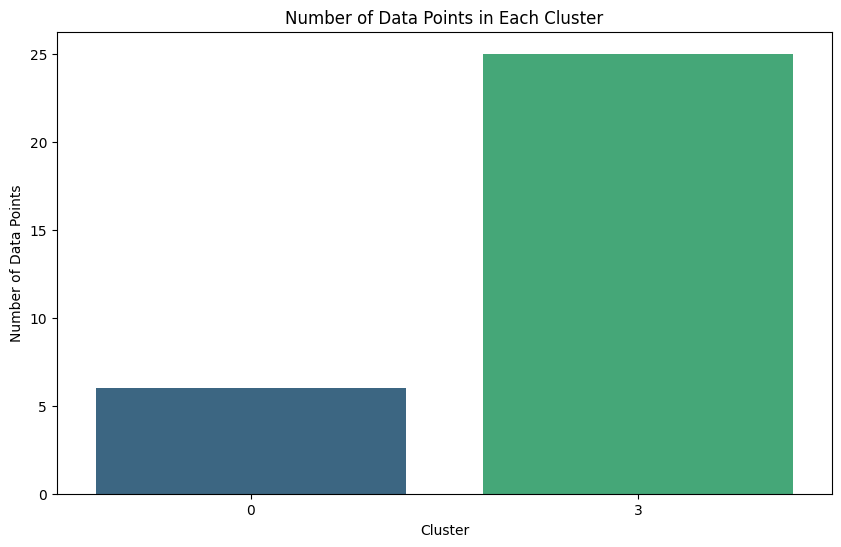

In [135]:
# K-means 클러스터링 수행
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_selected_train)

# 예측할 데이터 추출 (2022-12-01 ~ 2022-12-31)
X_selected_predict = predict_data_scaled[['합계 일사량(MJ/m2)', '1시간 최다일사량(MJ/m2)']]

# 예측 데이터의 클러스터 할당
predict_data['Cluster'] = kmeans.predict(X_selected_predict)

# 클러스터별 데이터 개수 계산
cluster_counts = predict_data['Cluster'].value_counts().sort_index()

# 클러스터별 데이터 개수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

Cluster 0 data saved to cluster_0.csv
Cluster 1 data saved to cluster_1.csv
Cluster 2 data saved to cluster_2.csv
Cluster 3 data saved to cluster_3.csv


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

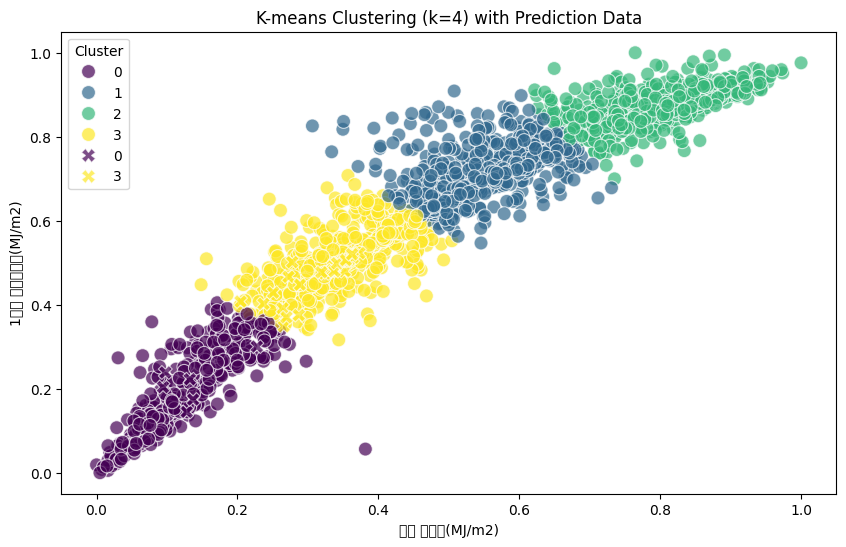

In [136]:
# 각 군집에 속하는 데이터만 추출하여 CSV 파일로 저장
for cluster_num in range(4):
    cluster_data = Gwangyang_df_scaled[Gwangyang_df_scaled['Cluster'] == cluster_num]
    cluster_data.to_csv(f'cluster_{cluster_num}.csv', index=False)
    print(f'Cluster {cluster_num} data saved to cluster_{cluster_num}.csv')


# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
# 학습 데이터 시각화
sns.scatterplot(x=X_selected_train.iloc[:, 0], y=X_selected_train.iloc[:, 1], hue=kmeans.labels_, palette='viridis', s=100, alpha=0.7)
# 예측 데이터 시각화
sns.scatterplot(x=X_selected_predict.iloc[:, 0], y=X_selected_predict.iloc[:, 1], hue=predict_data['Cluster'], palette='viridis', s=100, alpha=0.7, marker='X')

plt.title(f'K-means Clustering (k={k}) with Prediction Data')
plt.xlabel('합계 일사량(MJ/m2)')
plt.ylabel('1시간 최다일사량(MJ/m2)')
plt.legend(title='Cluster')
plt.show()

## K=3인 군집에서 일일발전량 예측

In [117]:
# cluster_3.csv 파일 읽기
cluster_data = pd.read_csv('cluster_3.csv')

# 특성과 목표 변수 설정
X = cluster_data.drop(columns=['일일발전량(Wh)', 'Cluster'])
y = cluster_data['일일발전량(Wh)']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 모델 평가 (테스트 데이터)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r_squared = r2_score(y_test, y_pred_test)

print("회귀 모델의 MSE:", mse)
print("회귀 모델의 MAE:", mae)
print("회귀 모델의 RMSE:", rmse)
print("회귀 모델의 R-squared:", r_squared)


회귀 모델의 MSE: 0.009515235058050884
회귀 모델의 MAE: 0.04786811727301045
회귀 모델의 RMSE: 0.09754606633817113
회귀 모델의 R-squared: 0.31548652216933215


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

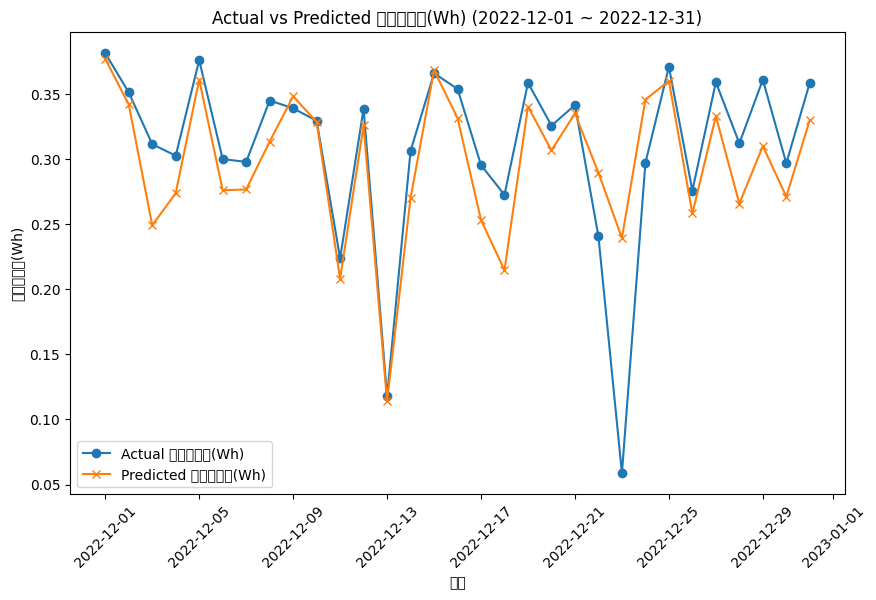

In [147]:

# 예측할 데이터 추출 (2022-12-01 ~ 2022-12-31)
predict_data = cluster_data.iloc[-31:]
predict_data_scaled = cluster_data.iloc[-31:]

# 특성과 목표 변수 설정 (예측 데이터)
X_predict = predict_data.drop(columns=['일일발전량(Wh)', 'Cluster'])
y_actual = predict_data['일일발전량(Wh)']

# 예측 수행
y_pred_predict = model.predict(X_predict)

# 날짜 인덱스 생성 (12월 1일 ~ 12월 31일)
dates = pd.date_range(start='2022-12-01', periods=len(y_actual), freq='D')

# comparison_df에 날짜 인덱스 추가
comparison_df = pd.DataFrame({'Actual': y_actual.values, 'Predicted': y_pred_predict}, index=dates)

# 실제값과 예측값 비교 (선 그래프)
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual 일일발전량(Wh)', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted 일일발전량(Wh)', marker='x')
plt.title('Actual vs Predicted 일일발전량(Wh) (2022-12-01 ~ 2022-12-31)')
plt.xlabel('날짜')
plt.ylabel('일일발전량(Wh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## PCA 사용 Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


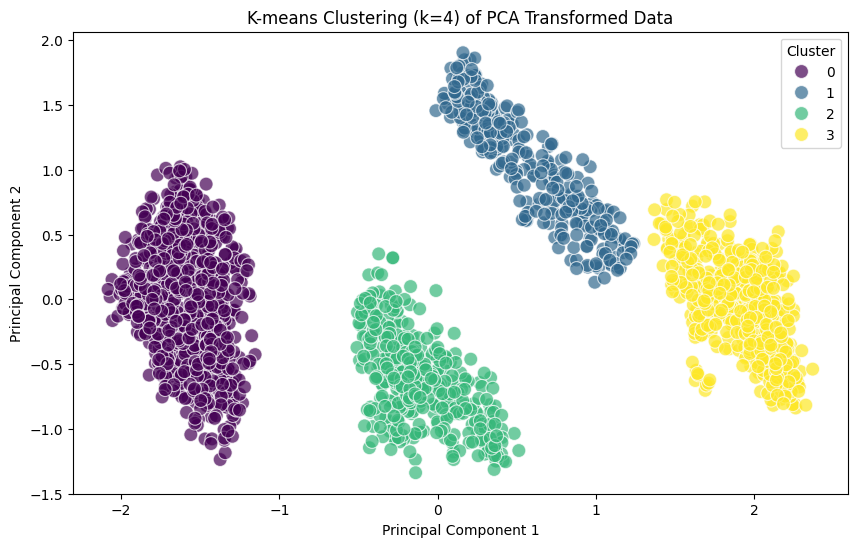

In [148]:
# 주성분 분석을 통한 데이터 변환
pca = PCA(random_state=42)
Gwangyang_pca = pca.fit_transform(Gwangyang_df_scaled.drop(columns=['일일발전량(Wh)']))

# 누적 설명 분산 비율 계산
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 주성분 선택
selected_components = np.where((cumulative_explained_variance_ratio >= 0.5) & (cumulative_explained_variance_ratio <= 0.9))[0] + 1

# 선택한 주성분으로 데이터 변환
X_pca_selected = Gwangyang_pca[:, selected_components - 1]

# K-means 클러스터링 수행
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
Gwangyang_df_scaled['Cluster'] = kmeans.fit_predict(X_pca_selected)

# 클러스터링 결과 시각화 (PC1과 PC2 기준)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_selected[:, 0], y=X_pca_selected[:, 1], hue=Gwangyang_df_scaled['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering (k=4) of PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

<ipython-input-158-67624af52f19>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predict_cluster_counts.index, y=predict_cluster_counts.values, palette='viridis')


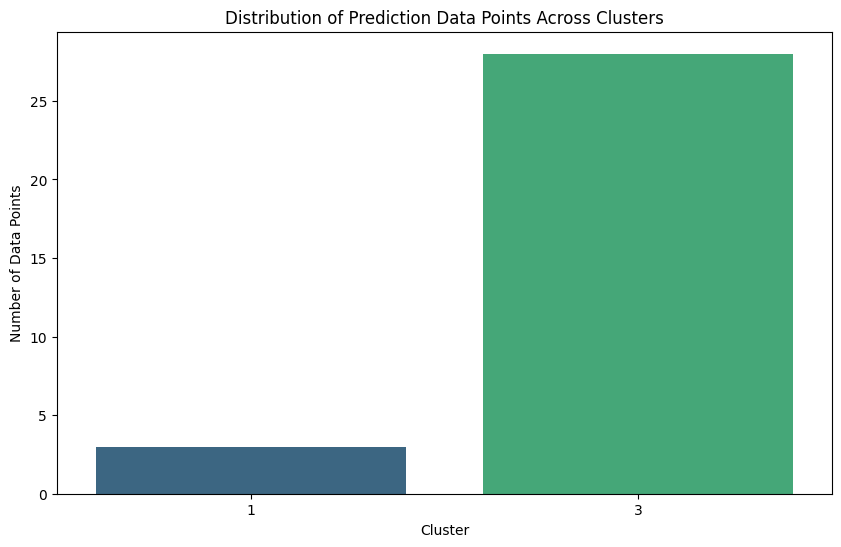

In [158]:
# Extract train data and prediction data
train_data_pca = Gwangyang_df_scaled.iloc[:-31].copy()
train_data_pca['Cluster'] = Gwangyang_df_scaled['Cluster'].iloc[:-31]
predict_data_pca = Gwangyang_df_scaled.iloc[-31:].copy()
predict_data_pca['Cluster'] = Gwangyang_df_scaled['Cluster'].iloc[-31:]

# Count the number of data points in each cluster for prediction data
predict_cluster_counts = predict_data_pca['Cluster'].value_counts()


# Plot the distribution of prediction data points across clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=predict_cluster_counts.index, y=predict_cluster_counts.values, palette='viridis')
plt.title('Distribution of Prediction Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


In [160]:
# 각 클러스터별로 데이터를 추출하여 CSV 파일로 저장
for cluster_num in cluster_counts.index:
    cluster_data = train_data_pca[train_data_pca['Cluster'] == cluster_num]
    file_name = f'PCA_cluster_{cluster_num}.csv'
    cluster_data.to_csv(file_name, index=False)
    print(f'클러스터 {cluster_num}에 속하는 데이터를 {file_name} 파일로 저장했습니다.')


클러스터 0에 속하는 데이터를 PCA_cluster_0.csv 파일로 저장했습니다.
클러스터 3에 속하는 데이터를 PCA_cluster_3.csv 파일로 저장했습니다.
클러스터 2에 속하는 데이터를 PCA_cluster_2.csv 파일로 저장했습니다.
클러스터 1에 속하는 데이터를 PCA_cluster_1.csv 파일로 저장했습니다.


In [162]:
# cluster_3.csv 파일 읽기
cluster_data = pd.read_csv('PCA_cluster_3.csv')

# 특성과 목표 변수 설정
X = cluster_data.drop(columns=['일일발전량(Wh)', 'Cluster'])
y = cluster_data['일일발전량(Wh)']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 모델 평가 (테스트 데이터)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r_squared = r2_score(y_test, y_pred_test)

print("회귀 모델의 MSE:", mse)
print("회귀 모델의 MAE:", mae)
print("회귀 모델의 RMSE:", rmse)
print("회귀 모델의 R-squared:", r_squared)


회귀 모델의 MSE: 0.0009459832559053869
회귀 모델의 MAE: 0.02197454837496231
회귀 모델의 RMSE: 0.03075684079851809
회귀 모델의 R-squared: 0.876240368504603


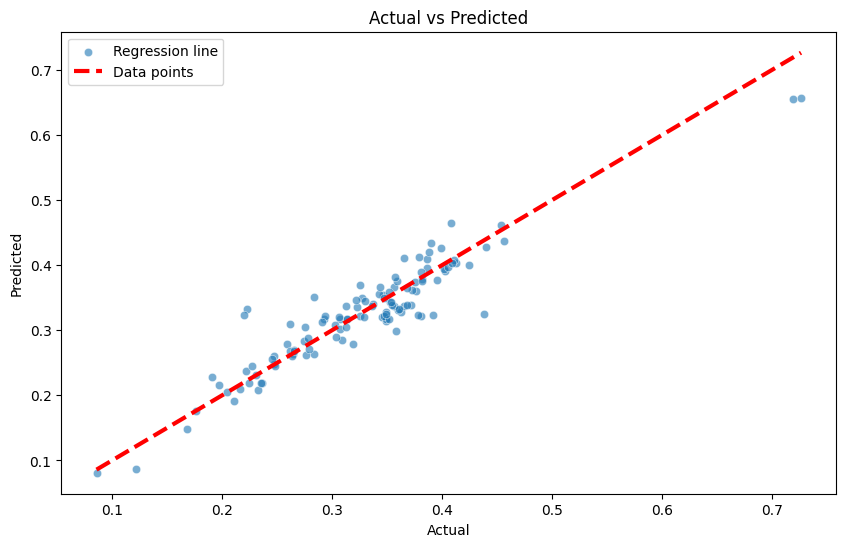

In [164]:
# Scatter plot and regression line visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(['Regression line', 'Data points'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

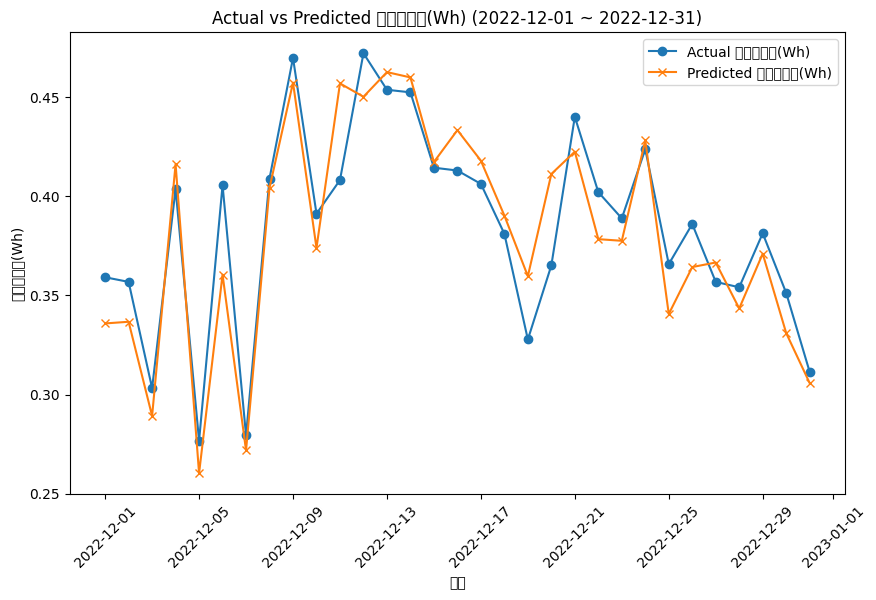

In [163]:
# 예측할 데이터 추출 (2022-12-01 ~ 2022-12-31)
predict_data = cluster_data.iloc[-31:]
predict_data_scaled = cluster_data.iloc[-31:]

# 특성과 목표 변수 설정 (예측 데이터)
X_predict = predict_data.drop(columns=['일일발전량(Wh)', 'Cluster'])
y_actual = predict_data['일일발전량(Wh)']

# 예측 수행
y_pred_predict = model.predict(X_predict)

# 날짜 인덱스 생성 (12월 1일 ~ 12월 31일)
dates = pd.date_range(start='2022-12-01', periods=len(y_actual), freq='D')

# comparison_df에 날짜 인덱스 추가
comparison_df = pd.DataFrame({'Actual': y_actual.values, 'Predicted': y_pred_predict}, index=dates)

# 실제값과 예측값 비교 (선 그래프)
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual 일일발전량(Wh)', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted 일일발전량(Wh)', marker='x')
plt.title('Actual vs Predicted 일일발전량(Wh) (2022-12-01 ~ 2022-12-31)')
plt.xlabel('날짜')
plt.ylabel('일일발전량(Wh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
cd /content/drive/MyDrive/Commit_File/24-1/DataScienceTeam9

/content/drive/MyDrive/Commit_File/24-1/DataScienceTeam9


In [ ]:
!git config --global user.email 'gjwon123@naver.com'
!git config --global user.name 'djftk'

In [ ]:
!git add --all

In [ ]:
!git commit -m 'feat : code (Choi)'
!git push